In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import os

In [3]:
DATA_PATH = os.path.abspath(os.path.join("..", "data", "processed", "processed_cohort.csv"))
df = pd.read_csv(DATA_PATH)

In [4]:
display(df.head())
display(df.info())
display(df.describe())

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,...,marital_status,race,edregtime,edouttime,hospital_expire_flag,anchor_age,gender,num_diagnoses,next_admittime,readmitted_within_30d
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P49AFC,TRANSFER FROM HOSPITAL,HOME,Medicaid,...,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0,52,F,8.0,2180-06-26 18:27:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P784FA,EMERGENCY ROOM,HOME,Medicaid,...,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0,52,F,8.0,2180-07-23 12:35:00,1
2,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P06OTX,EMERGENCY ROOM,HOME,Medicaid,...,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0,52,F,13.0,2180-08-05 23:44:00,1
3,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P19UTS,EMERGENCY ROOM,HOSPICE,Medicaid,...,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0,52,F,10.0,NaN,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P39NWO,EMERGENCY ROOM,NaN,NaN,...,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0,19,F,1.0,NaN,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546028 entries, 0 to 546027
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   subject_id             546028 non-null  int64  
 1   hadm_id                546028 non-null  int64  
 2   admittime              546028 non-null  object 
 3   dischtime              546028 non-null  object 
 4   deathtime              11790 non-null   object 
 5   admission_type         546028 non-null  object 
 6   admit_provider_id      546024 non-null  object 
 7   admission_location     546027 non-null  object 
 8   discharge_location     396210 non-null  object 
 9   insurance              536673 non-null  object 
 10  language               545253 non-null  object 
 11  marital_status         532409 non-null  object 
 12  race                   546028 non-null  object 
 13  edregtime              379240 non-null  object 
 14  edouttime              379240 non-nu

None

,subject_id,hadm_id,hospital_expire_flag,anchor_age,num_diagnoses,readmitted_within_30d
count,5.460280e+05,5.460280e+05,546028.000000,546028.000000,545497.000000,546028.000000
mean,1.501118e+07,2.500100e+07,0.021612,56.890777,11.667320,0.200343
std,2.877694e+06,2.888710e+06,0.145415,18.969772,7.625992,0.400258
min,1.000003e+07,2.000002e+07,0.000000,18.000000,1.000000,0.000000
25%,1.252380e+07,2.249662e+07,0.000000,43.000000,6.000000,0.000000
50%,1.501961e+07,2.500385e+07,0.000000,58.000000,10.000000,0.000000
75%,1.750403e+07,2.750282e+07,0.000000,71.000000,16.000000,0.000000
max,1.999999e+07,2.999994e+07,1.000000,91.000000,57.000000,1.000000


In [5]:
target_counts = df['readmitted_within_30d'].value_counts()
print("Target Distribution:")
display(target_counts)

Target Distribution:


readmitted_within_30d
0    436635
1    109393
Name: count, dtype: int64

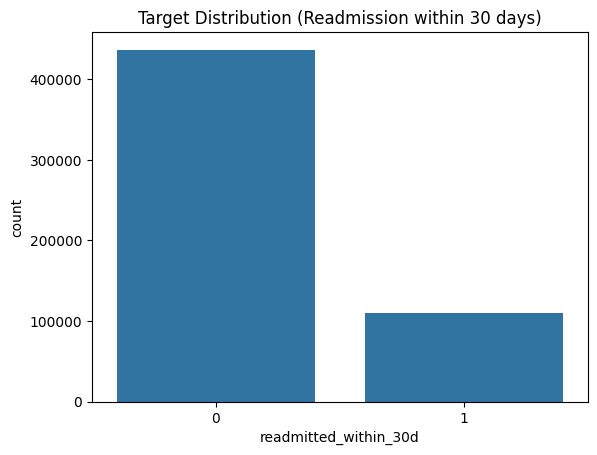

In [6]:
sns.countplot(x='readmitted_within_30d', data=df)
plt.title("Target Distribution (Readmission within 30 days)")
plt.show()

In [7]:
missing_perc = df.isna().mean().sort_values(ascending=False)
print("Missing values percentage:")
display(missing_perc)

Missing values percentage:


deathtime                0.978408
next_admittime           0.409232
edouttime                0.305457
edregtime                0.305457
discharge_location       0.274378
marital_status           0.024942
insurance                0.017133
language                 0.001419
num_diagnoses            0.000972
admit_provider_id        0.000007
admission_location       0.000002
gender                   0.000000
anchor_age               0.000000
hospital_expire_flag     0.000000
subject_id               0.000000
race                     0.000000
hadm_id                  0.000000
admission_type           0.000000
dischtime                0.000000
admittime                0.000000
readmitted_within_30d    0.000000
dtype: float64

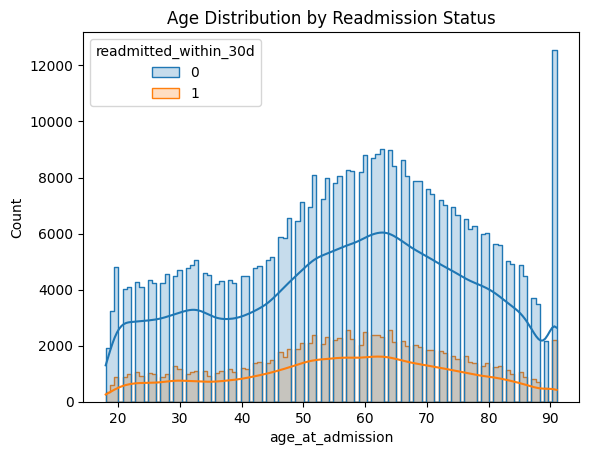

In [8]:
df['age_at_admission'] = df['anchor_age']
sns.histplot(data=df, x='age_at_admission', hue='readmitted_within_30d', element='step', kde=True)
plt.title("Age Distribution by Readmission Status")
plt.show()

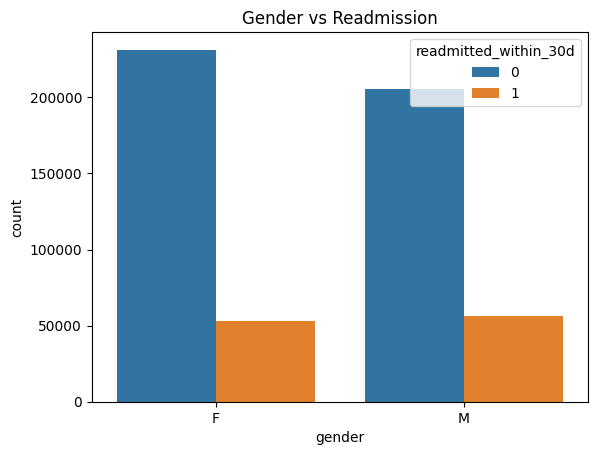

In [9]:
sns.countplot(x='gender', hue='readmitted_within_30d', data=df)
plt.title("Gender vs Readmission")
plt.show()

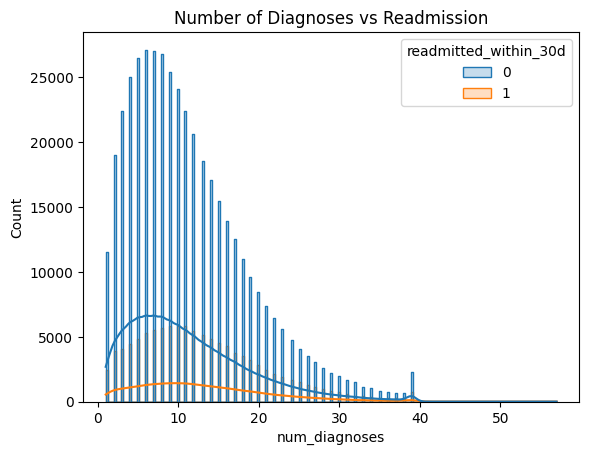

In [10]:
sns.histplot(data=df, x='num_diagnoses', hue='readmitted_within_30d', kde=True, element='step')
plt.title("Number of Diagnoses vs Readmission")
plt.show()